In [209]:
# Setting up shop

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [210]:
# Let's load you up
df = pd.read_csv('BankChurners.csv')

# What do you look like?
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])



Number of observations (rows): 10127
Number of features (columns): 23


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

I notice the last 2 columns are probably leftovers from client's own previous analysis. we will drop these, as they are unneeded.



In [212]:
# drop all columns that have "Naive_Bayes" in the name (unnecessary, probably leftover from client's own previous analysis)
df = df.drop(columns=df.columns[df.columns.str.contains('Naive_Bayes')])

# how many columns are there now?
print(df.shape[1])



21


In [213]:
# how many columns are there?
print(df.shape[1])

# Close up on columns
df.columns


21


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [214]:
#Close up on your data types
df.dtypes

# How many unique values in each column?
df.nunique()


CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [215]:
# Check for null values
# print(df.isnull().sum())


In [216]:
# how many numerical columns are there?
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical columns:", len(numerical_columns))
print("Numerical columns are:", numerical_columns)


# how many categorical columns are there?
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Number of categorical columns:", len(categorical_columns))
print("Categorical columns are:", categorical_columns)



Number of numerical columns: 15
Numerical columns are: Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Number of categorical columns: 6
Categorical columns are: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


### Numerical features: 15

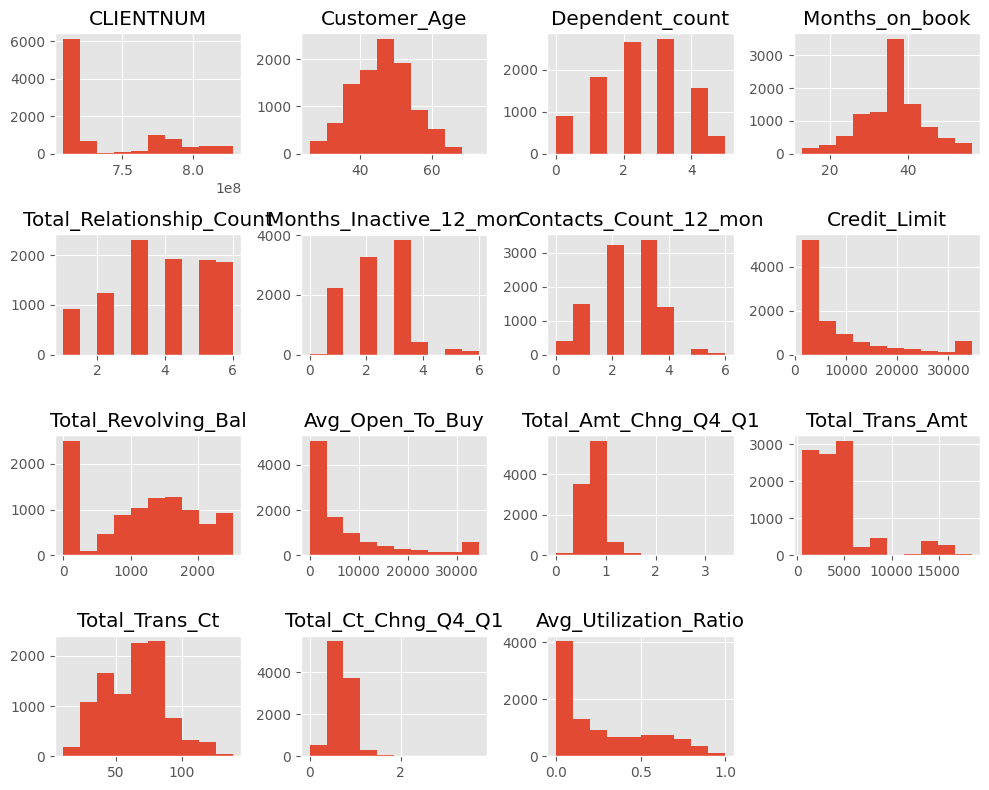

In [217]:
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Categorical features: 6

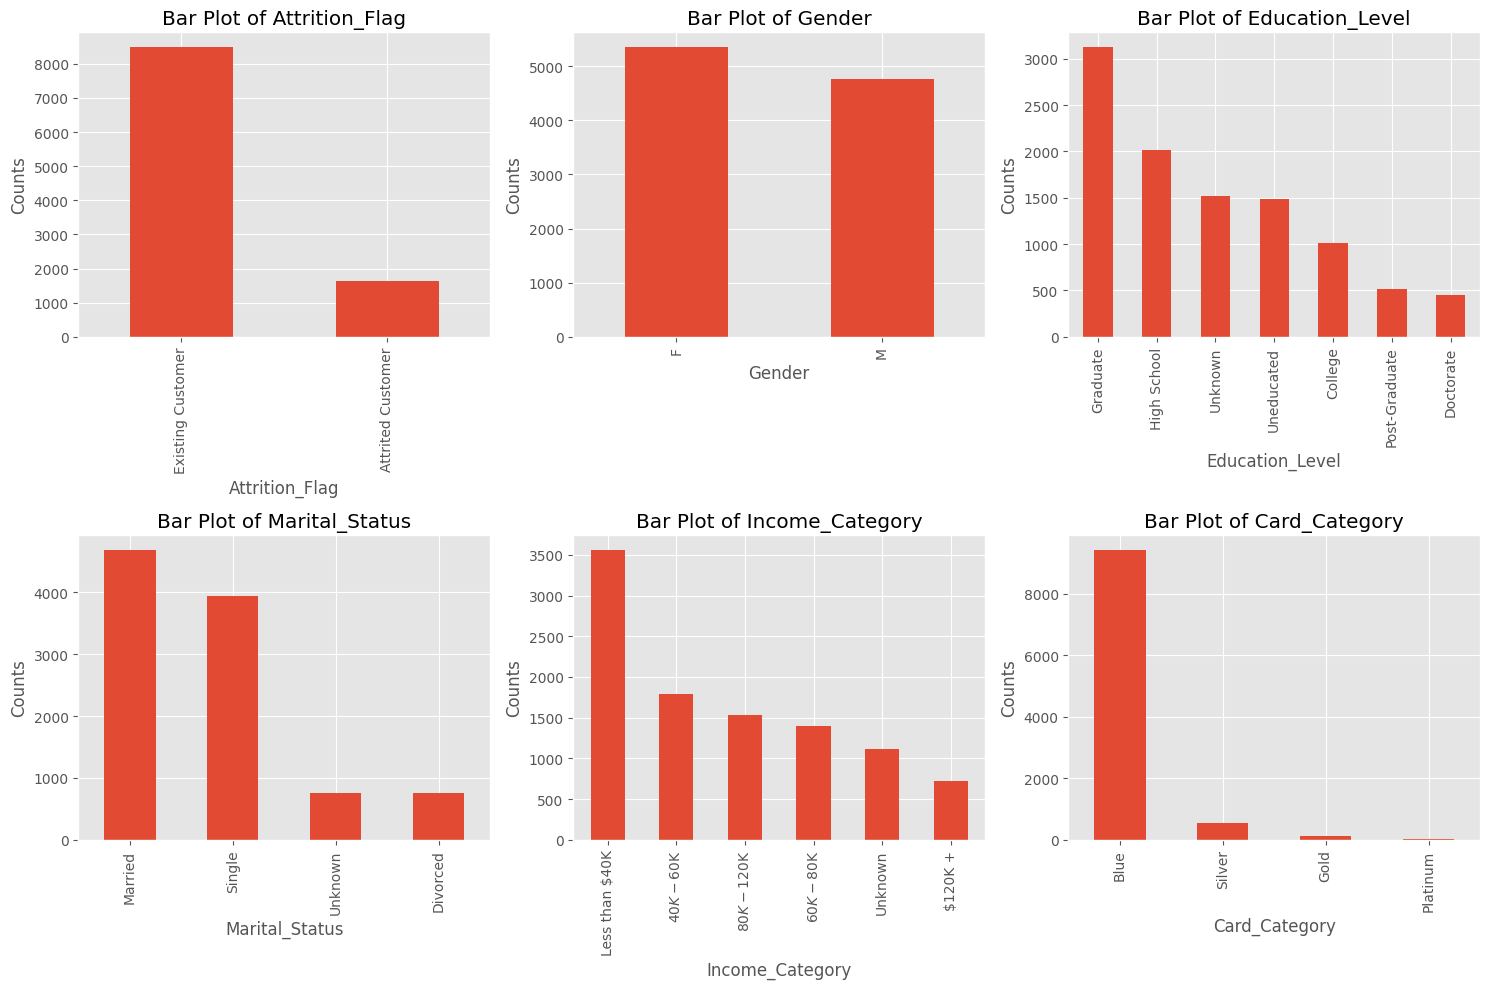

In [218]:
# Bar plots for categorical features displayed in a grid with three plots per row for better visibility
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
num_cols = len(categorical_columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed for three plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figsize and layout based on number of rows

for i, column in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]  # Determine the position of the subplot
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [219]:
# # drop CLIENTNUM (just an index)
df = df.drop(columns=['CLIENTNUM'])

In [220]:
# # print(df.columns)

# # One way to encode, with dropping Unknowns, encode the binary categorical columns

# df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0}).astype(int)
# df['Gender'] = df['Gender'].replace({'F': 1, 'M': 0}).astype(int)


# # one-hot-encode the other categorical columns while dropping unknown values, then drop the original columns that were OHE-ed

# # The columns to encode and the category I want to drop from each one
# columns_to_encode = {
#     'Education_Level': 'Unknown',
#     'Income_Category': 'Unknown',
#     'Marital_Status': 'Unknown',
#     'Card_Category': 'Platinum'
# }

# # Perform one-hot encoding and drop specified categories
# for column, drop_cat in columns_to_encode.items():
#      dummies = pd.get_dummies(df[column], prefix=column)
#      if drop_cat in dummies:
#          dummies.drop(columns=f"{column}_{drop_cat}", inplace=True)
#      df = pd.concat([df, dummies], axis=1)
#      df.drop(columns=[column], inplace=True)  # Optionally drop the original column if it's no longer needed


In [221]:
# how many numerical columns are there now?
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical columns:", len(numerical_columns))
print("Numerical columns are:", numerical_columns)

# how many categorical columns are there now?
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Number of categorical columns:", len(categorical_columns))
print("Categorical columns are:", categorical_columns)



Number of numerical columns: 14
Numerical columns are: Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Number of categorical columns: 6
Categorical columns are: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


Original numerical columns: 14

Numerical columns are: 

'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

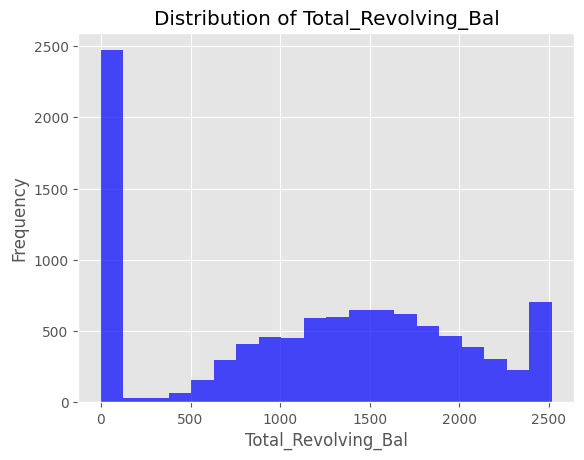

In [222]:
# What is this Total_Revolving_Bal feature? What does it mean?!
# Why do you ppl do this, why don't you at least provide a dictionary for your stupid abbreviated feature names
# Later edit: It means "Total Revolving Balance".. "Balance"

plt.hist(df['Total_Revolving_Bal'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Total_Revolving_Bal')
plt.xlabel('Total_Revolving_Bal')
plt.ylabel('Frequency')
plt.show()



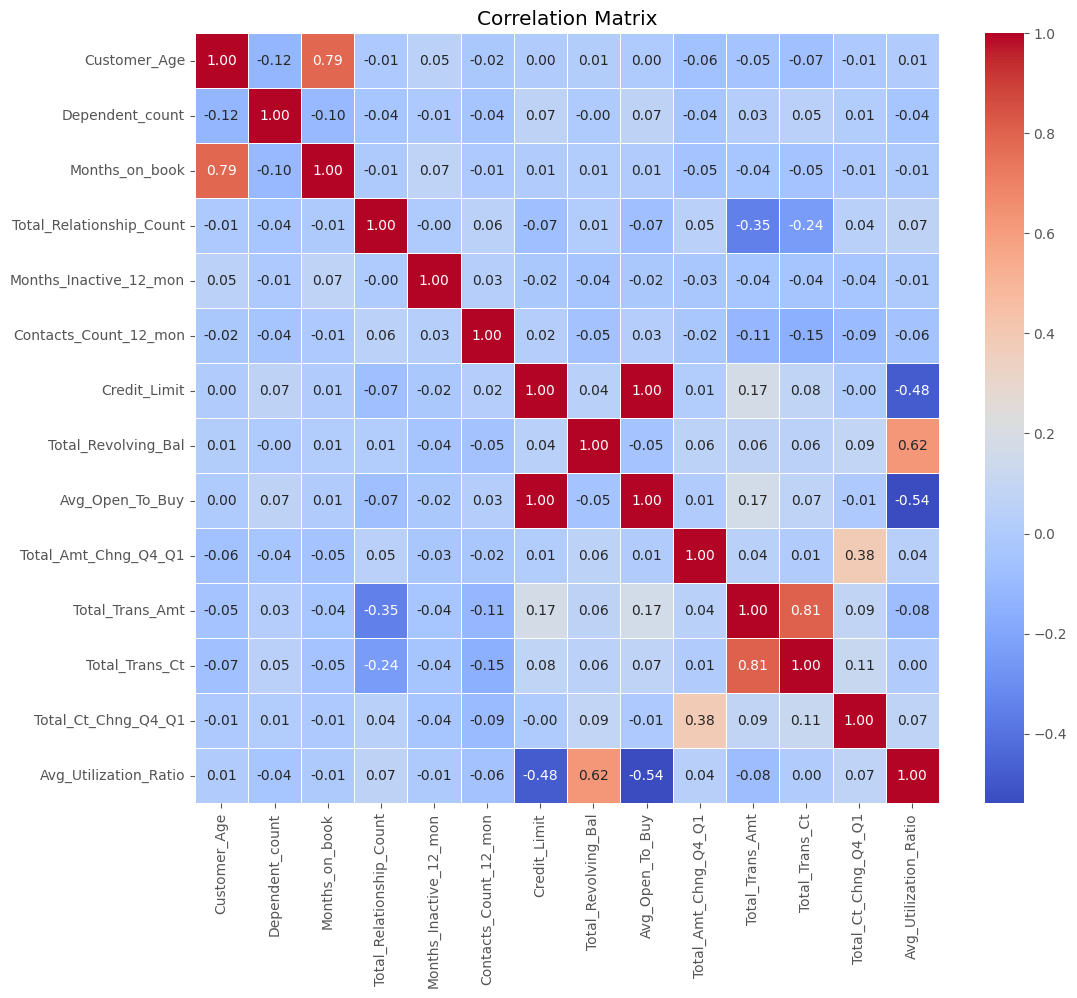

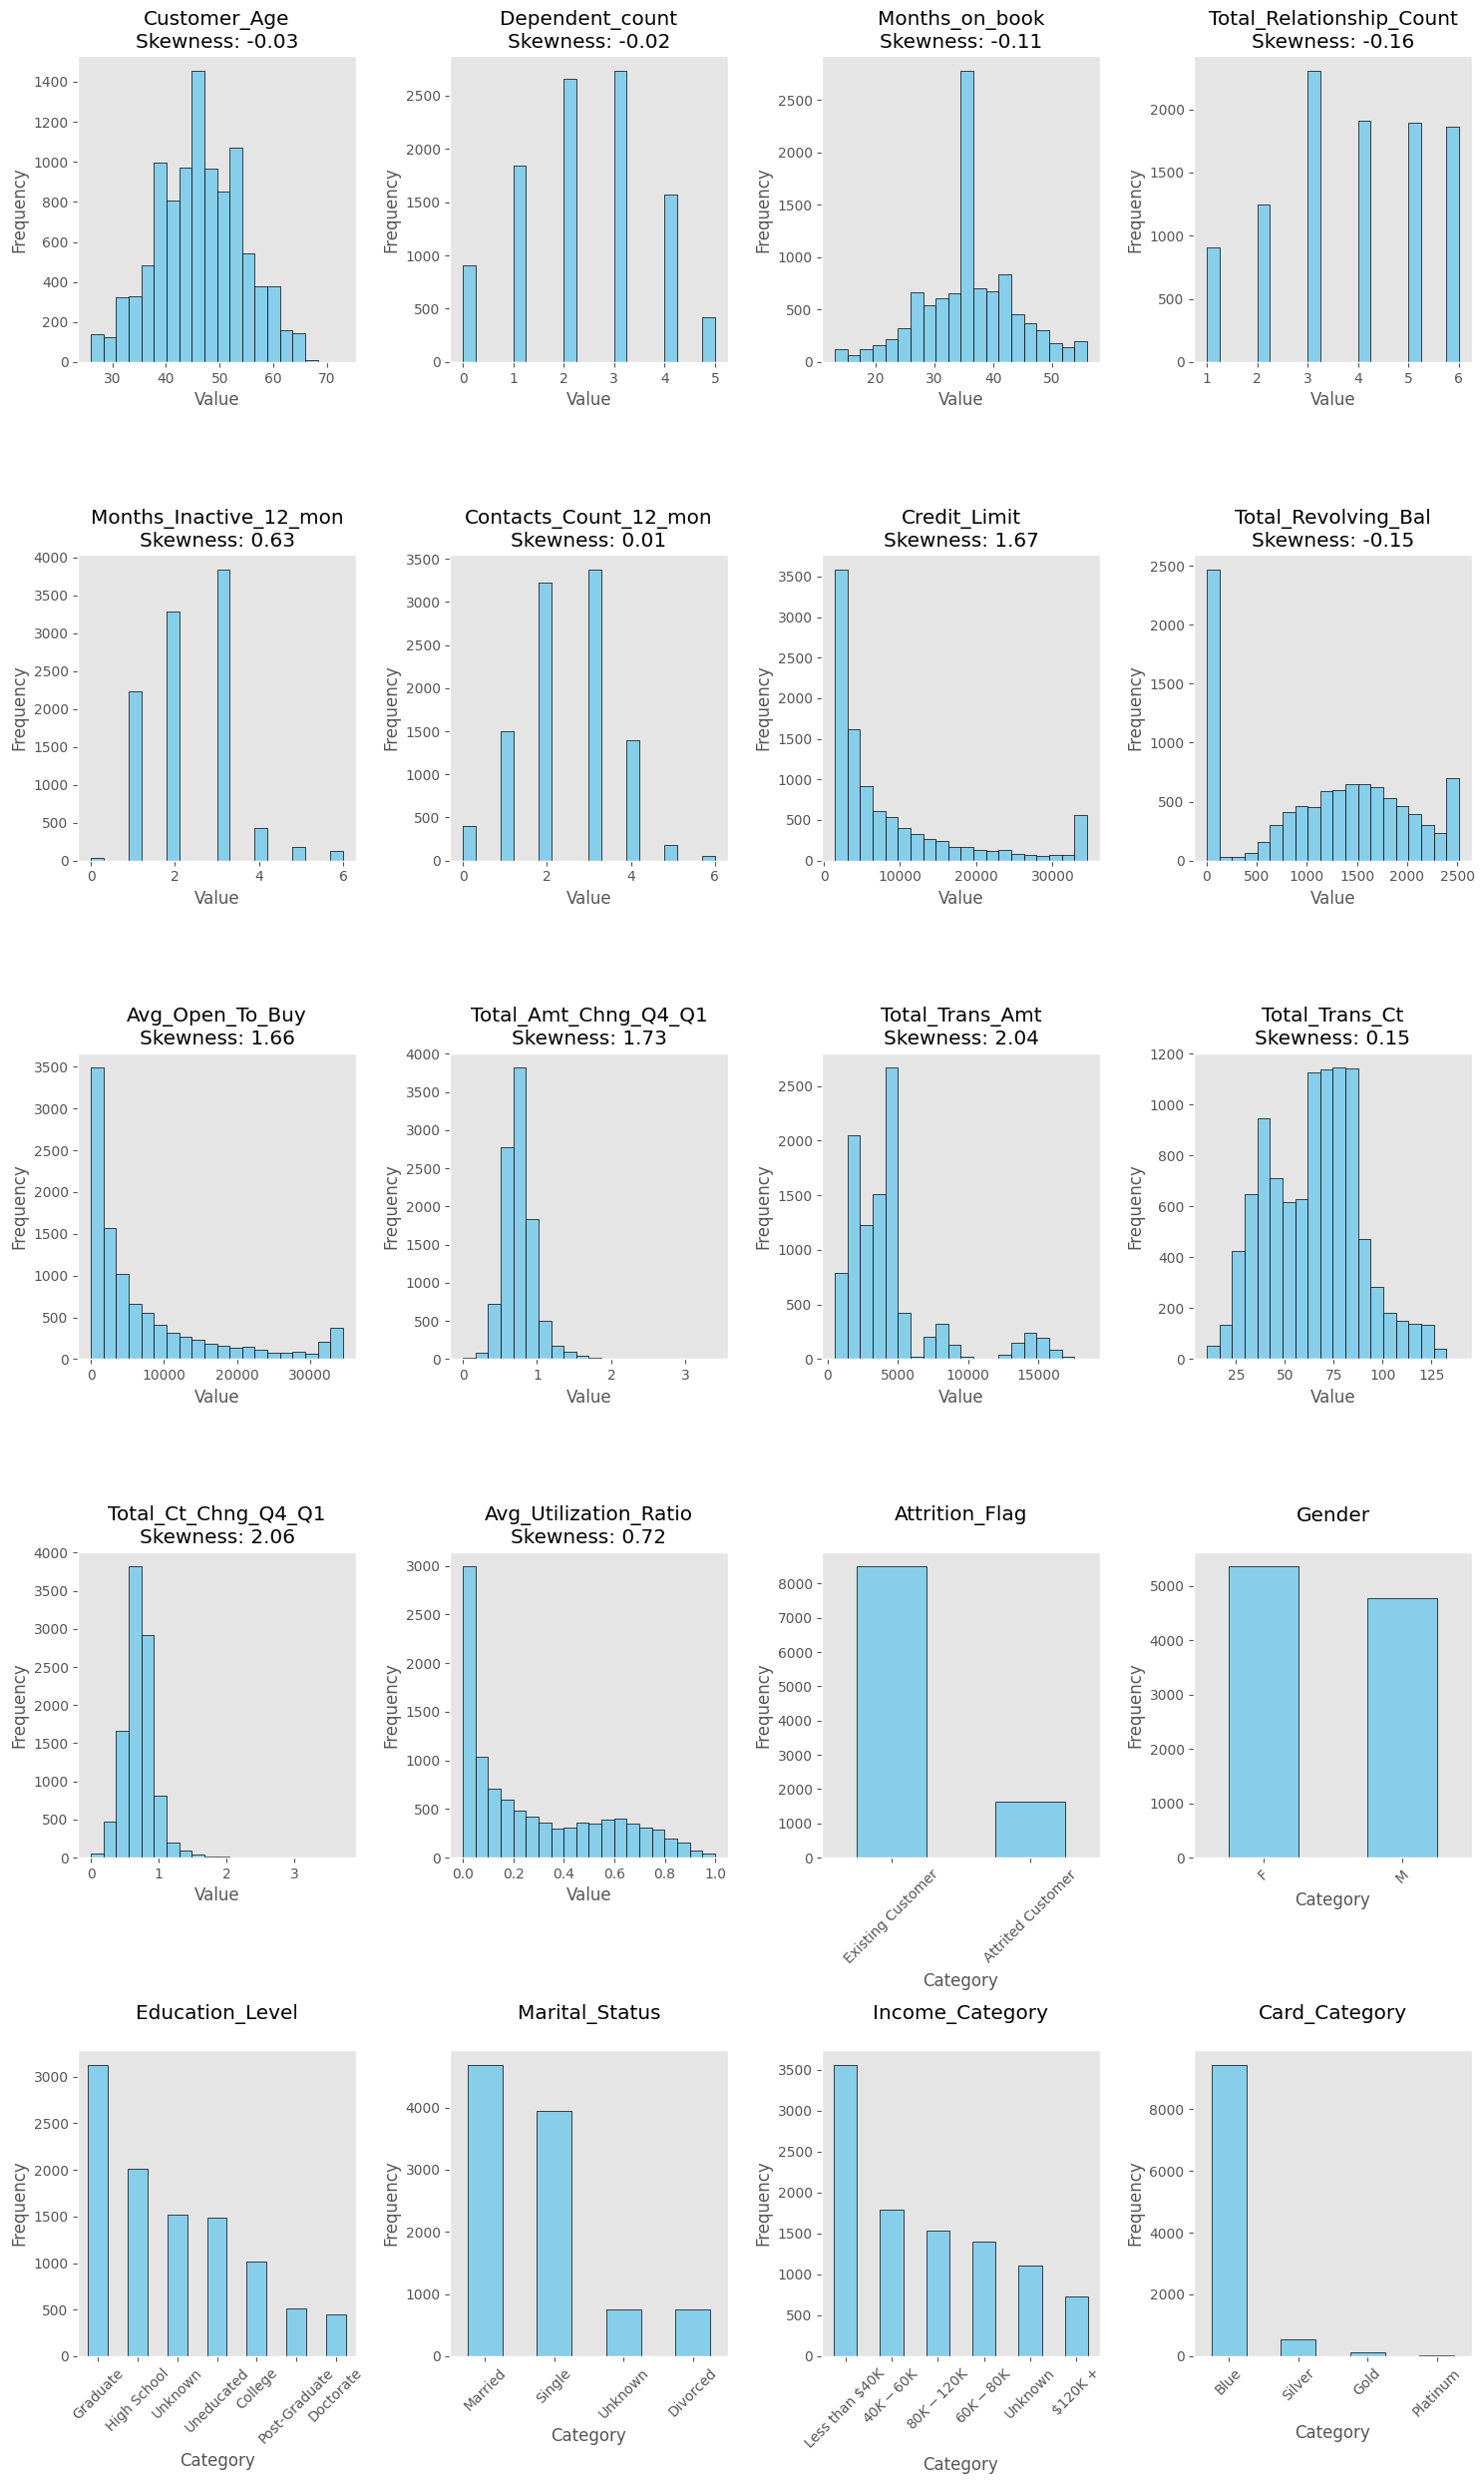

In [223]:
import math

# Create analysis functions
def plot_correlation_matrix(data):
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

def plot_histograms_with_skewness(data):
    num_columns = len(data.columns)
    num_rows = math.ceil(num_columns / 4)
    plt.figure(figsize=(15, 5 * num_rows))
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    # Plot histograms for numerical columns
    for i, column in enumerate(numerical_columns):
        plt.subplot(num_rows, 4, i + 1)
        data[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f"{column}\nSkewness: {data[column].skew():.2f}")
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(False)
    
    # Plot bar plots for categorical columns
    for i, column in enumerate(categorical_columns, start=len(numerical_columns)):
        plt.subplot(num_rows, 4, i + 1)
        data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"{column}\n")
        plt.xlabel('Category')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


# Plot correlation matrix  and histograms
plot_correlation_matrix(df)
plot_histograms_with_skewness(df)

In [239]:
def print_unique_values(data):
    object_columns = data.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        unique_values = data[column].unique()
        print(f"{column}: {unique_values}")

print_unique_values(df)

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


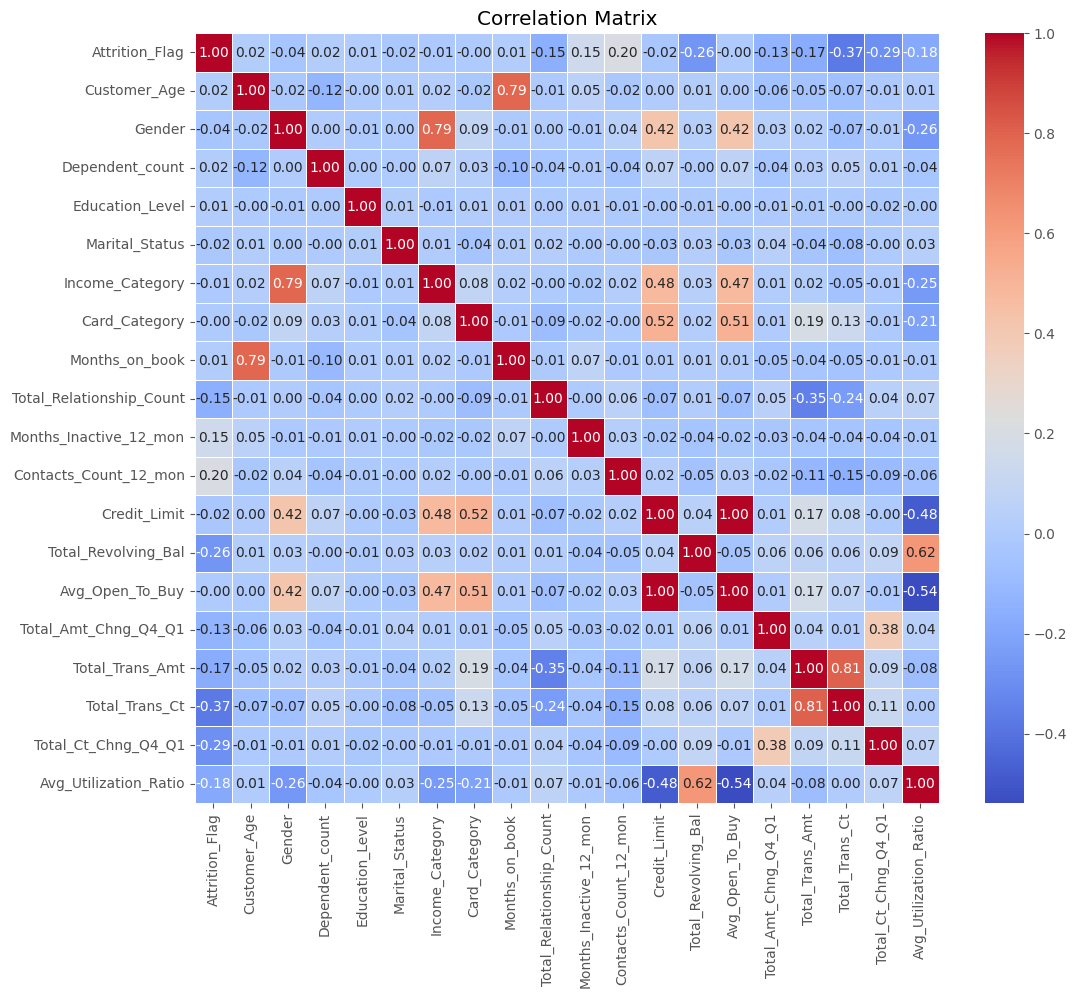

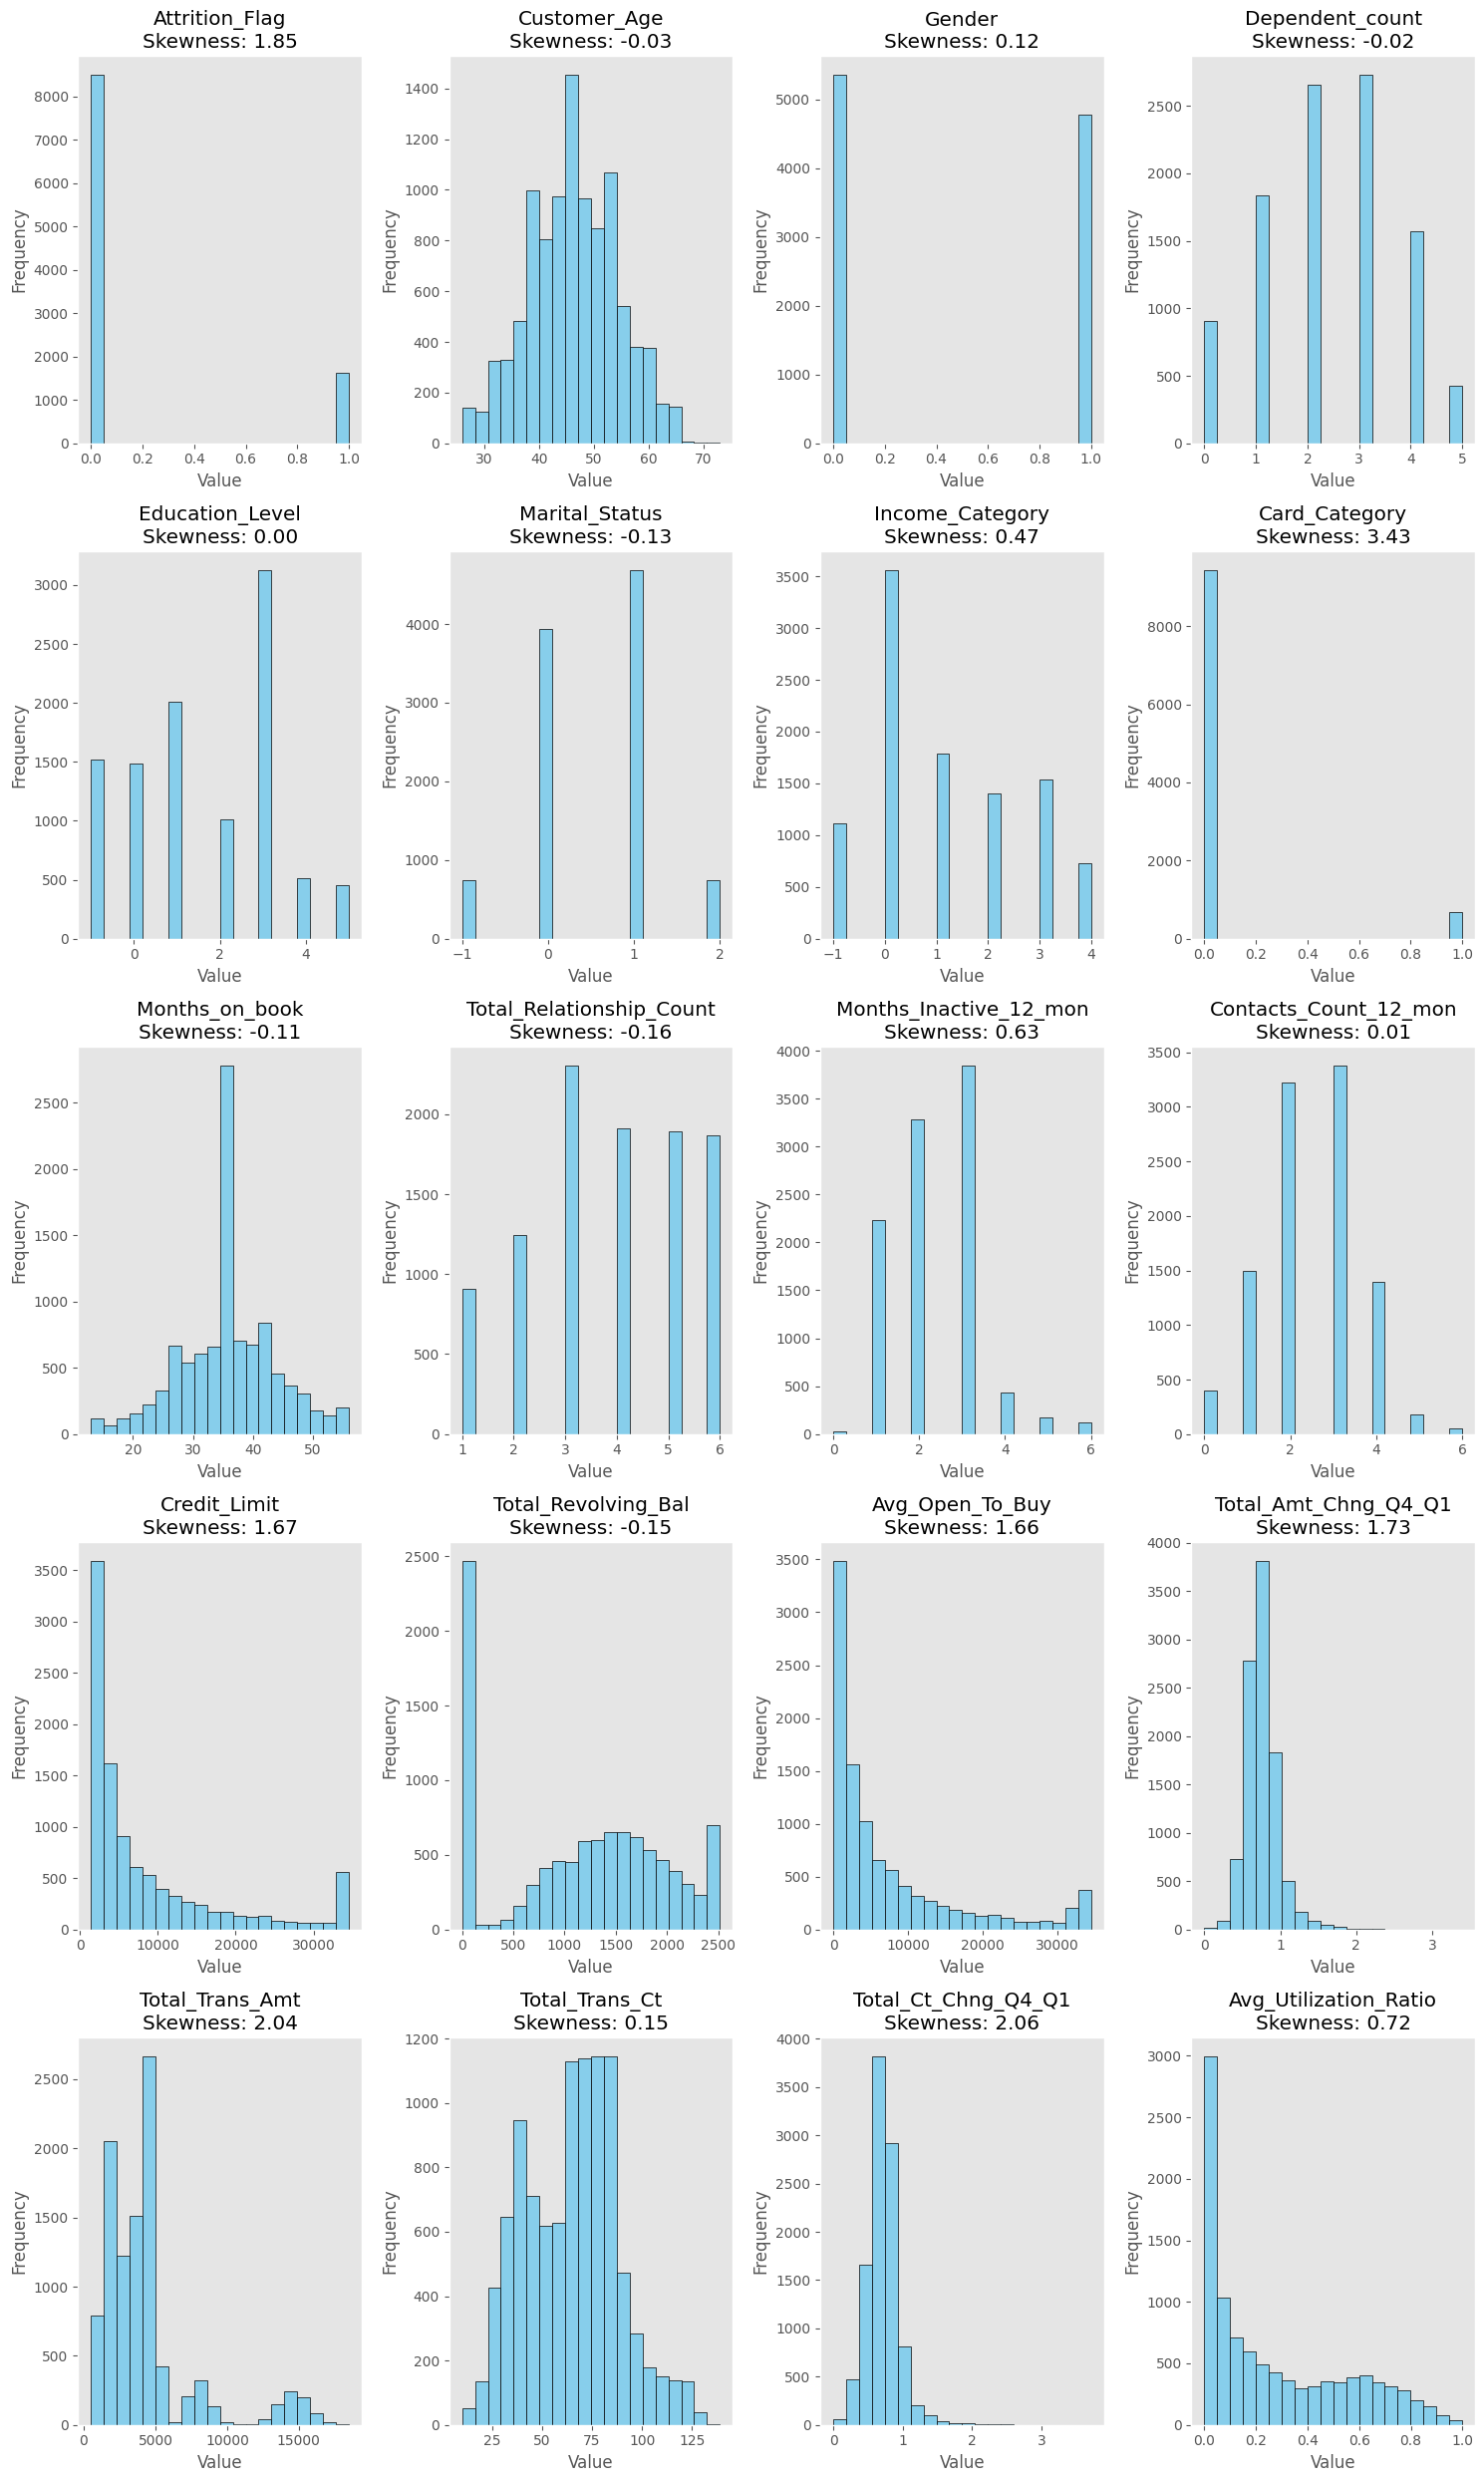

In [242]:
def label_encode_columns(data, encoding_dicts):
    encoded_data = data.copy()
    for column, encoder_dict in encoding_dicts.items():
        encoded_data[column] = encoded_data[column].map(encoder_dict)
    return encoded_data

# Original unique values for object columns
original_unique_values = {
    'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
    'Gender': ['M', 'F'],
    'Education_Level': ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate'],
    'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
    'Income_Category': ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']
}

# Encoding dictionaries
encoding_dicts = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Gender': {'M': 1, 'F': 0},
    'Education_Level': {'High School': 1, 'Graduate': 3, 'Uneducated': 0, 'Unknown': -1, 'College': 2, 'Post-Graduate': 4, 'Doctorate': 5},
    'Marital_Status': {'Married': 1, 'Single': 0, 'Unknown': -1, 'Divorced': 2},
    'Income_Category': {'$60K - $80K': 2, 'Less than $40K': 0, '$80K - $120K': 3, '$40K - $60K': 1, '$120K +': 4, 'Unknown': -1},
    'Card_Category': {'Blue': 0, 'Gold': 1, 'Silver': 1, 'Platinum': 1}
}

# Apply label encoding
encoded_data = label_encode_columns(df, encoding_dicts)

# Plot correlation matrix for numeric columns
plot_correlation_matrix(encoded_data)
plot_histograms_with_skewness(encoded_data)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.93      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026



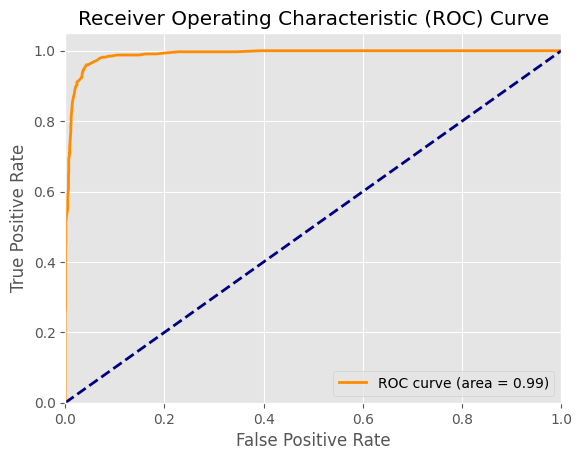

In [243]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

def random_forest_classifier(data):
    # Import the churn_data dataset
    data = label_encode_columns(data, encoding_dicts)

    # Split the data into features and target variable
    X = data.drop(columns=['Attrition_Flag'])
    y = data['Attrition_Flag']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Evaluate the model on test data
    y_pred = classifier.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

random_forest_classifier(df)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1699
           1       0.63      0.35      0.45       327

    accuracy                           0.86      2026
   macro avg       0.76      0.66      0.69      2026
weighted avg       0.84      0.86      0.85      2026



/Users/miruna/repos/churn-predictor/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


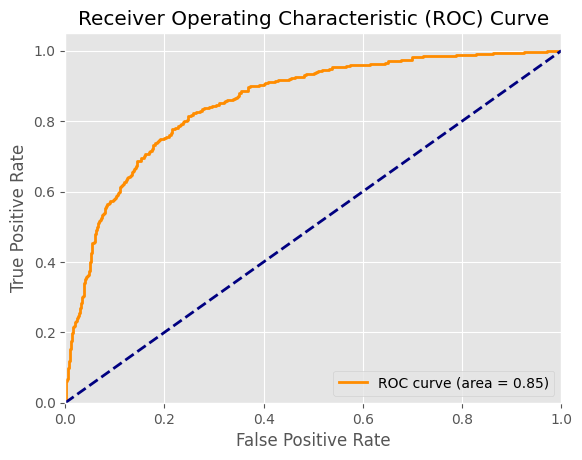

In [244]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

def logistic_regression_classifier(data):
    # Import the churn_data dataset
    data = label_encode_columns(data, encoding_dicts)

    # Split the data into features and target variable
    X = data.drop(columns=['Attrition_Flag'])
    y = data['Attrition_Flag']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    # Evaluate the model on test data
    y_pred = classifier.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_classifier(df)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1699
           1       0.46      0.80      0.58       327

    accuracy                           0.82      2026
   macro avg       0.71      0.81      0.73      2026
weighted avg       0.87      0.82      0.83      2026



/Users/miruna/repos/churn-predictor/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


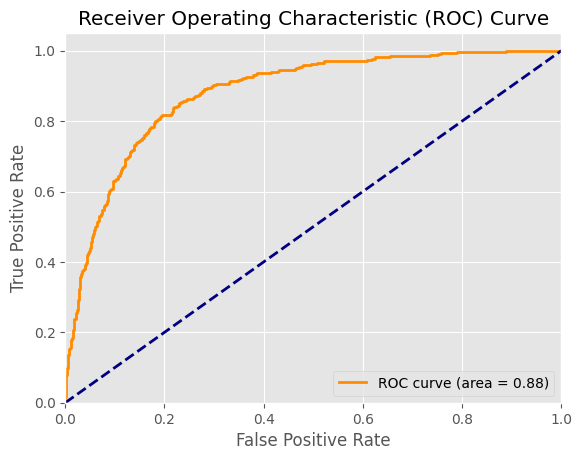

In [245]:
# same as above, but with class_weight='balanced'

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

def logistic_regression_classifier(data):
    # Import the churn_data dataset
    data = label_encode_columns(data, encoding_dicts)

    # Split the data into features and target variable
    X = data.drop(columns=['Attrition_Flag'])
    y = data['Attrition_Flag']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Logistic Regression classifier
    classifier = LogisticRegression(random_state=42, class_weight='balanced') # class_weight='balanced' is used to handle imbalanced data (performs worst tho than not using the parameter..)
    classifier.fit(X_train, y_train)

    # Evaluate the model on test data
    y_pred = classifier.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

logistic_regression_classifier(df)

Hmm, ROC score for Logistic Regression with the parameter class_weight='balanced' added in, for balancing the classes, is slightly better (0.88 as opposed to 0.85 without it). I'll try balancing with SMOTE

In [246]:
print(df.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [247]:
# from sklearn.preprocessing import StandardScaler, PowerTransformer
# from sklearn.compose import ColumnTransformer
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# import pandas as pd


# # # Original unique values for object columns
# original_unique_values = {
#     'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
#     'Gender': ['M', 'F'],
#     'Education_Level': ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate'],
#     'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
#     'Income_Category': ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown'],
#     'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']
# }

# # Encoding dictionaries
# encoding_dicts = {
#     'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
#     'Gender': {'M': 1, 'F': 0},
#     'Education_Level': {'High School': 1, 'Graduate': 3, 'Uneducated': 0, 'Unknown': -1, 'College': 2, 'Post-Graduate': 4, 'Doctorate': 5},
#     'Marital_Status': {'Married': 1, 'Single': 0, 'Unknown': -1, 'Divorced': 2},
#     'Income_Category': {'$60K - $80K': 2, 'Less than $40K': 0, '$80K - $120K': 3, '$40K - $60K': 1, '$120K +': 4, 'Unknown': -1},
#     'Card_Category': {'Blue': 0, 'Gold': 1, 'Silver': 1, 'Platinum': 1}
# }

# def label_encode_columns(data, encoding_dicts):
#     encoded_data = data.copy()
#     for column, encoder_dict in encoding_dicts.items():
#         encoded_data[column] = encoded_data[column].map(encoder_dict)
#     return encoded_data

# # # Apply label encoding
# encoded_data = label_encode_columns(df, encoding_dicts)


# def preprocess_data(data):
#     # Copy the data to avoid modifying the original dataframe
#     data = data.copy()
    
#     # Identify numerical columns (those that are left as integers or floats)
#     numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
#     # Define a pipeline for numerical transformations
#     numerical_transformer = Pipeline(steps=[
#         ('power', PowerTransformer(method='yeo-johnson')),  # Power transform
#         ('scaler', StandardScaler())  # Standard scaling
#     ])
    
#     # Apply ColumnTransformer to apply transformations only to numerical columns
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', numerical_transformer, numerical_columns)
#         ],
#         remainder='passthrough'  # Leave other columns untouched
#     )
    
#     # Separate features and target variable
#     X = data.drop(columns=['Attrition_Flag'])
#     y = data['Attrition_Flag']
    
#     # Apply transformations
#     X_transformed = preprocessor.fit_transform(X)
#     X_transformed = pd.DataFrame(X_transformed, columns=numerical_columns + [col for col in X.columns if col not in numerical_columns])
    
#     # Apply SMOTE to balance the classes
#     smote = SMOTE(random_state=42)
#     X_resampled, y_resampled = smote.fit_resample(X_transformed, y)
    
#     return X_resampled, y_resampled

# # Example usage:

# try:
#     X_preprocessed, y_preprocessed = preprocess_data(encoded_data)
# except KeyError as e:
#     print(e)


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def train_logistic_regression(X, y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Logistic Regression model
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Preprocess the data
X_preprocessed, y_preprocessed = preprocess_data(df, encoding_dicts)

# Train and evaluate the Logistic Regression model
train_logistic_regression(X_preprocessed, y_preprocessed)

TypeError: preprocess_data() takes 1 positional argument but 2 were given